>Instituto de Informática  <br>
Alex Echeverria <br>
### Universidade Federal de Goiás <br>
### **Inteligência Artificial Aplicada a Saúde** <br>

# Batimentos cardíacos - MIT-BIH | Paciente 2

## Importando a base dados e fazendo uma pequena amostra

In [ ]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Paciente = '2';

# Definir o caminho onde o dataset se encontra
base_path = 'https://raw.githubusercontent.com/aveusalex/Predicao_Extra_sistolicos/main/Paciente2' + '/'

# # Carregar dataset 
xtest = pd.read_csv(base_path + 'Teste.csv')
xtrain = pd.read_csv(base_path + 'Treino.csv')
idx_normal = pd.read_csv(base_path + 'Index.csv')


In [ ]:
xtest.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82
0,-1.812987,-1.809091,-1.742857,-1.628571,-1.510390,-1.431169,-1.406494,-1.414286,-1.418182,-1.392208,-1.322078,-1.194805,-1.037662,-0.827273,-0.637662,-0.429870,-0.249351,-0.112987,0.031169,0.136364,2.129870e-01,0.233766,0.253247,0.349351,0.541558,0.846753,1.274026,1.931169,2.825974,3.964935,5.233766,6.538961,7.653247,8.329870,8.558442,8.293506,7.570130,6.412987,4.779221,2.777922,...,-4.015584,-6.161039,-8.066234,-9.715584,-11.063636,-12.019481,-12.403896,-12.235065,-11.457143,-10.137662,-8.310390,-6.228571,-4.164935,-2.296104,-0.640260,0.728571,1.775325,2.472727,2.724675,2.715584,2.476623,2.145455,1.802597,1.493506,1.157143,0.816883,0.522078,0.310390,0.124675,-0.001299,-0.090909,-0.100000,-0.040260,0.007792,0.055844,0.061039,0.036364,-0.032468,-0.061039,1
1,-0.228571,-0.155844,-0.079221,-0.015584,-0.014286,0.010390,-0.025974,0.016883,0.046753,0.119481,0.161039,0.194805,0.232468,0.259740,0.333766,0.401299,0.457143,0.535065,0.659740,0.894805,1.183117e+00,1.437662,1.583117,1.632468,1.592208,1.406494,1.198701,0.815584,0.323377,-0.370130,-1.087013,-1.801299,-2.375325,-2.658442,-2.581818,-2.100000,-1.316883,-0.468831,0.154545,0.277922,...,-0.731169,-0.961039,-1.027273,-0.922078,-0.623377,-0.257143,0.074026,0.203896,0.076623,-0.237662,-0.614286,-0.975325,-1.209091,-1.122078,-0.596104,0.375325,1.562338,2.627273,3.167532,3.151948,2.762338,2.237662,1.774026,1.357143,1.053247,0.901299,0.805195,0.844156,0.906494,0.958442,0.954545,0.902597,0.825974,0.722078,0.638961,0.598701,0.535065,0.523377,0.488312,1
2,-0.451948,-0.370130,-0.293506,-0.209091,-0.131169,-0.050649,0.028571,0.037662,0.087013,0.138961,0.140260,0.196104,0.248052,0.292208,0.338961,0.336364,0.370130,0.436364,0.509091,0.635065,8.000000e-01,0.911688,0.870130,0.636364,0.176623,-0.485714,-1.297403,-2.298701,-3.516883,-4.818182,-6.038961,-6.993506,-7.532468,-7.610390,-7.190909,-6.296104,-5.087013,-3.777922,-2.644156,-1.822078,...,-0.103896,0.664935,1.512987,2.398701,3.249351,4.019481,4.503896,4.559740,4.241558,3.723377,3.157143,2.693506,2.463636,2.538961,3.020779,3.754545,4.548052,5.120779,5.244156,4.888312,4.174026,3.383117,2.594805,1.945455,1.518182,1.275325,1.170130,1.072727,0.963636,0.883117,0.857143,0.802597,0.710390,0.615584,0.536364,0.544156,0.525974,0.538961,0.566234,1
3,-0.383117,-0.427273,-0.476623,-0.598701,-0.698701,-0.762338,-0.812987,-0.820779,-0.783117,-0.672727,-0.506494,-0.301299,-0.115584,-0.010390,0.066234,0.155844,0.203896,0.263636,0.346753,0.461039,7.298701e-01,1.163636,1.833766,2.724675,3.801299,5.070130,6.355844,7.584416,8.740260,9.783117,10.718182,11.501299,12.064935,12.306494,12.157143,11.551948,10.512987,8.971429,6.985714,4.641558,...,-3.193506,-5.572727,-7.661039,-9.310390,-10.511688,-11.319481,-11.744156,-11.825974,-11.538961,-10.902597,-9.992208,-8.884416,-7.662338,-6.390909,-5.128571,-3.900000,-2.829870,-1.924675,-1.176623,-0.625974,-0.212987,0.022078,0.164935,0.231169,0.254545,0.206494,0.220779,0.280519,0.329870,0.396104,0.507792,0.544156,0.584416,0.581818,0.509091,0.422078,0.350649,0.283117,0.249351,1
4,-1.629870,-1.742857,-1.851948,-1.983117,-2.107792,-2.181818,-2.174026,-2.124675,-2.063636,-1.914286,-1.762338,-1.623377,-1.474026,-1.397403,-1.309091,-1.181818,-1.045455,-0.890909,-0.631169,-0.348052,2.879641e-15,0.468831,1.105195,1.922078,2.850649,3.877922,4.887013,5.928571,6.932468,7.833766,8.694805,9.440260,9.955844,10.257143,10.119481,9.570130,8.681818,7.459740,5.898701,4.096104,...,-2.303896,-4.412987,-6.242857,-7.776623,-8.998701,-9.953247,-10.540260,-10.811688,-10.771429,-10.438961,-9.829870,-9.006494,-8.010390,-6.946753,-5.837662,-4.732468,-3.676623,-2.744156,-1.931169,-1.341558,-0.938961,-0.655844,-0.535065,-0.427273,-0.301299,-0.233766,-0.163636,-0.055844,-0.019481,0.057143,0.080519,0.063636,0.019481,-0.07792

In [ ]:
xtrain.shape

(374, 82)

## Fazendo o tratamento dos dados

In [ ]:
# renomeando a ultima coluna (rótulos)
xtrain.rename(columns={"82": "rotulos"}, inplace=True)
xtest.rename(columns={"82": "rotulos"}, inplace=True)

In [ ]:
# contando quantos assistolicos temos no dataset de treino
qtd_assistolicos = xtrain.query('rotulos == -1')["rotulos"].count()
qtd_normais = xtrain.query('rotulos == 1')["rotulos"].count()

print(f"Quantidade de pacientes normais: {qtd_normais}")
print(f"Quantidade de pacientes extra-sistolicos: {qtd_assistolicos}")
print(f"Total: {qtd_normais + qtd_assistolicos}")

Quantidade de pacientes normais: 294
Quantidade de pacientes extra-sistolicos: 80
Total: 374


In [ ]:
# Separar y real
ytest = xtest['rotulos']
ytrain = xtrain['rotulos']

# Remover y do conjunto de treino
xtest = xtest.drop(columns=['rotulos'])
xtrain = xtrain.drop(columns=['rotulos'])

In [ ]:
print("Extra-sistolicos(treino):", np.where(ytrain == -1)[0].shape)
print("\nNormais(treino):", np.where(ytrain == 1)[0].shape)

print("\nExtra-sistolicos(teste):", np.where(ytest == -1)[0].shape)
print("\nNormais(teste):", np.where(ytest == 1)[0].shape)

Extra-sistolicos(treino): (80,)

Normais(treino): (294,)

Extra-sistolicos(teste): (26,)

Normais(teste): (99,)


## Visualização de um batimento (linha da tabela)


In [ ]:
# visualizando um batimento (uma linha da tabela)
xtrain.iloc[np.where(ytrain == -1)[0][0]]

1     0.088312
2     0.141558
3     0.209091
4     0.283117
5     0.331169
        ...   
77   -4.438961
78   -3.558442
79   -2.929870
80   -2.510390
81   -2.242857
Name: 292, Length: 81, dtype: float64

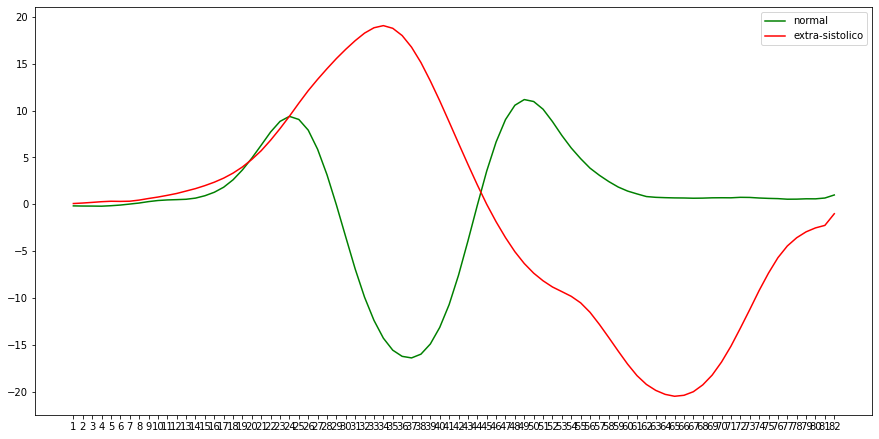

In [ ]:
fig, axs = plt.subplots(1, # Gerar apenas uma figura 
                        figsize=(15, 7.5) # Tamanho da figura
                        )



# plotar primeiro batimento normal
axs.plot(xtrain.iloc[np.where(ytrain == 1)[0][0]],
            color='green', # Definir cor da linha
          )

# plotar primeiro batimento extrasistólico
axs.plot(xtrain.iloc[np.where(ytrain == -1)[0][0]],
            color='red', # Definir cor da linha
          )

axs.legend(["normal", "extra-sistolico"])

## Importando e utilizando o modelo de regressão linear nos dados tratados


In [ ]:
from sklearn import linear_model as lm

# Carregar modelo de regressão linear
# Gerar coeficientes com base no seu conjunto de treinamento
lm = lm.LinearRegression()
model = lm.fit(xtrain,ytrain)

In [ ]:
# Coeficientes da regressão * novos dados de testes
ypredicted = lm.predict(xtest)

## Transformando valores contínuos em valores discretos

In [ ]:
# colocar os valores continuos em duas classes -1 ou 1.
ypredicted_transformado = []

for predicao in ypredicted:
    if predicao > 0:
       ypredicted_transformado.append(1)
    elif predicao < 0:
        ypredicted_transformado.append(-1)
        

print(ypredicted_transformado) 
print(len(ypredicted_transformado))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, -1, 1]
125


## Verificando as predições certas e as erradas

In [ ]:
# verificar as predições certas e erradas.
certas = 0
erradas = 0
index_erradas = []
for i in range(len(ypredicted_transformado)):
    if ytest[i] == ypredicted_transformado[i]:
        certas += 1
    else:
        erradas += 1
        index_erradas.append(i)

In [ ]:
print(f"O treino teve {certas} predicoes certas e {erradas} predicoes erradas.")

O treino teve 109 predicoes certas e 16 predicoes erradas.


In [ ]:
# verificar falsos positivos e falsos negativos
falsos_neg = 0
falsos_pos = 0
index_falsos_neg = []
index_falsos_pos = []

for index in index_erradas:
    if ypredicted_transformado[index] == 1 and ytest[index] == -1:  # previu como pessoa normal, mas eh extra-sistolico
        falsos_neg += 1
        index_falsos_neg.append(index)

    elif ypredicted_transformado[index] == -1 and ytest[index] == 1: # previu como extra_sistolico, mas eh pessoa normal
        falsos_pos += 1
        index_falsos_pos.append(index)


In [ ]:
print(f"O treino teve {falsos_neg} falsos negativos e {falsos_pos} falsos positivos.")

O treino teve 13 falsos negativos e 3 falsos positivos.


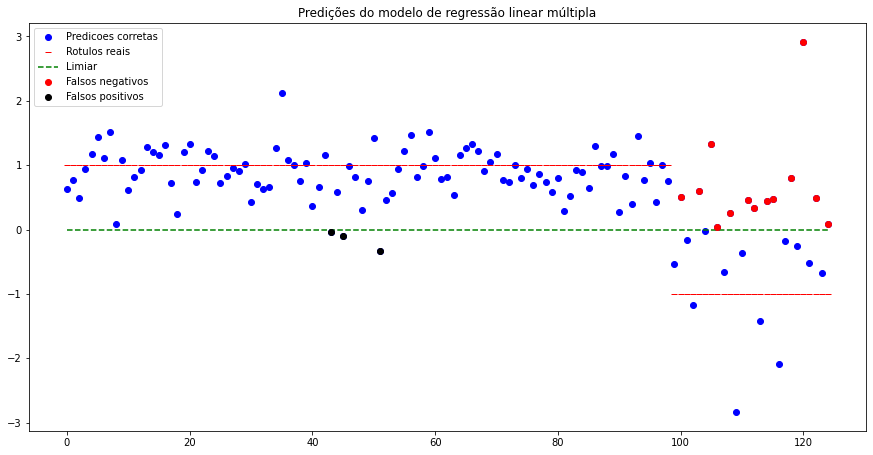

In [ ]:
fig, axs = plt.subplots(1, # Gerar apenas uma figura 
                        figsize=(15, 7.5) # Tamanho da figura
                        )

# plotar y predito com a representação de circulos azuis
axs.plot(ypredicted , 'bo')

# plotar y real com a representação de uma reta vermelha
axs.plot(ytest, '_r')

# plotar limiar definido para classificação
axs.plot(np.zeros([ypredicted.shape[0], 1]),
        color='green', linestyle='dashed')

# plotar erros cometidos pelo modelo de regressão de falsos negativos
axs.plot(index_falsos_neg, ypredicted[index_falsos_neg], 'ro')

# plotar erros cometidos pelo modelo de regressão de falsos positivos
axs.plot(index_falsos_pos, ypredicted[index_falsos_pos], 'ko')

plt.title('Predições do modelo de regressão linear múltipla')
axs.legend(["Predicoes corretas", "Rotulos reais", "Limiar", "Falsos negativos", "Falsos positivos"])

In [ ]:
# visualizar um exemplo de batiemnto previsto certo e errado
batimento_certo = []
batimento_errado = []

for i in range(1, 83):
    batimento_certo.append(xtest[[str(i)]].iloc[22])
    batimento_errado.append(xtest[[str(i)]].iloc[45])

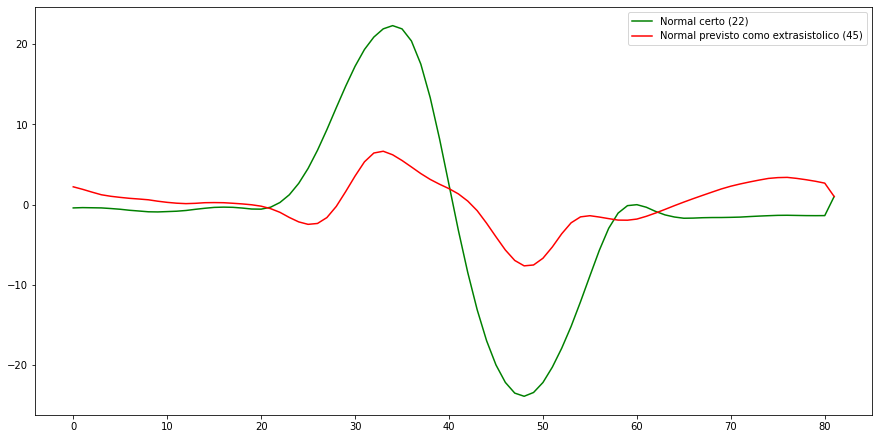

In [ ]:
fig, axs = plt.subplots(1, # Gerar apenas uma figura 
                        figsize=(15, 7.5) # Tamanho da figura
                        )

# plotar batimento normal previsto correto
axs.plot(batimento_certo, color='green')

# plotar primeiro batimento extrasistólico
axs.plot(batimento_errado, color='red')

axs.legend(["Normal certo (22)", "Normal previsto como extrasistolico (45)"])

In [ ]:
# plotar todos os batimentos que foram preditos erroneamente
batimentos_errados = []

for batimento in index_erradas:
    batimento_aux = []
    for i in range(1, 83):
        batimento_aux.append(xtest[[str(i)]].iloc[batimento])
    batimentos_errados.append(batimento_aux + [batimento])

In [ ]:
batimentos_errados[0][-1]

43

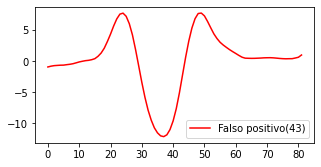

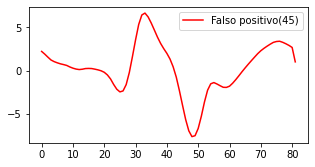

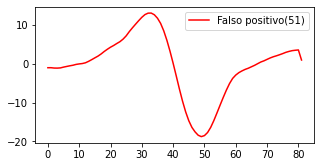

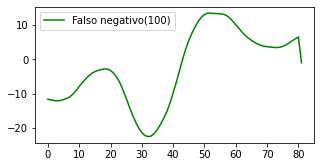

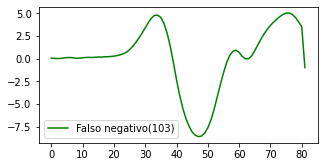

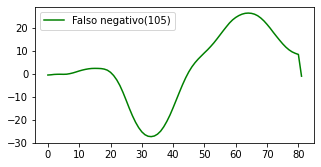

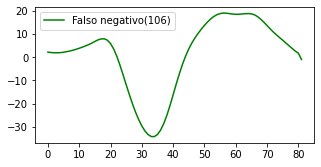

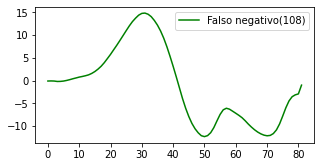

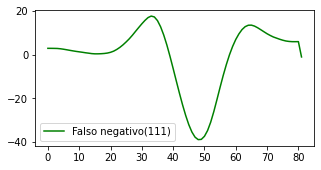

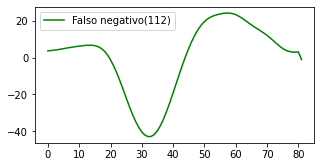

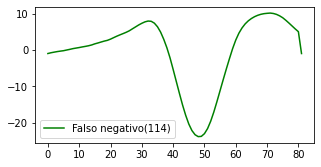

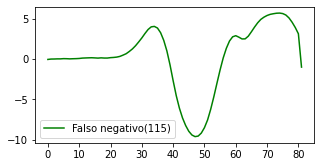

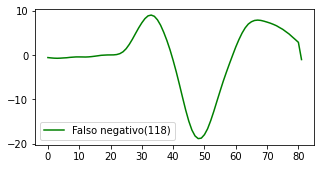

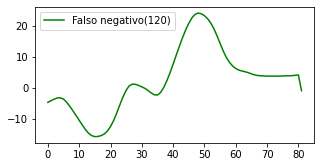

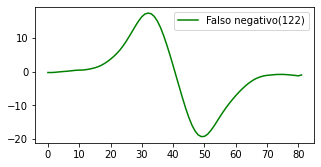

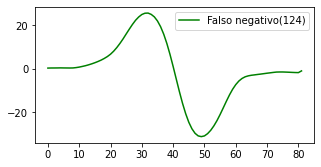

In [ ]:
for batimento in batimentos_errados:
    fig, axs = plt.subplots(1, figsize=(5, 2.5))
    
    if batimento[82] in index_falsos_pos:
        axs.plot(batimento[:-1], color='red')
        axs.legend([f"Falso positivo({batimento[82]})"])
    else:
        axs.plot(batimento[:-1], color='green')
        axs.legend([f"Falso negativo({batimento[82]})"])


Acuracia do modelo: 0.8720 



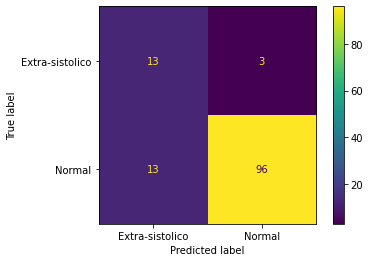

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Exibir acurácia da classificação
print("Acuracia do modelo: %.4f \n" %(1 - (len(index_falsos_neg) + len(index_falsos_pos))/len(ytest)))

# Exibir a matriz de confusão
cm = confusion_matrix(ytest, ypredicted_transformado)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Extra-sistolico", "Normal", "Extra-sistolico", "Normal"])
disp.plot()